In [42]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression in 1D & 2D

![title](img/reg_table.png)

$m$ - number of traning instances<br>
$n$ = number of features

 * Target value is continuously varying variable, e.g. price of a house, countrie's gdp.

In [2]:
# selecting data
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print('\n' + boston['DESCR'][296:1226])


        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


**Let's predict HOUSE value from CRIM feature**

In [24]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.CRIM.describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

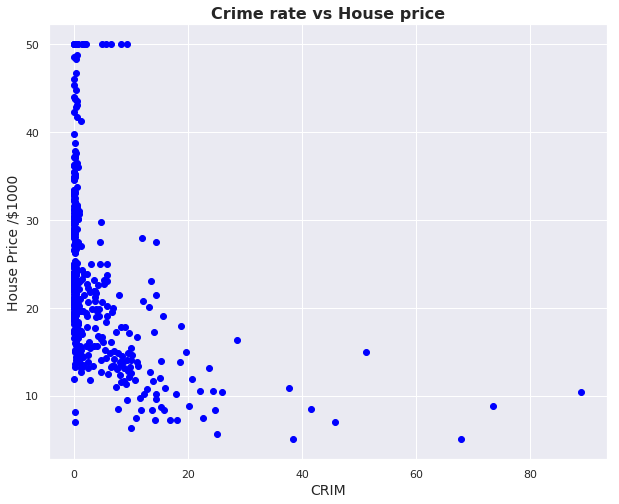

In [17]:
# data
X = boston.data[:,0].reshape(-1,1)
y = boston.target

# plot crime rate vs median house value
sns.set()
plt.figure(figsize=(10,8))
plt.scatter(X, y, c='blue')
plt.title('Crime rate vs House price', weight='bold', fontsize=16)
plt.xlabel(boston.feature_names[0], fontsize=14)
plt.ylabel('House Price /$1000', fontsize=14)
plt.show()

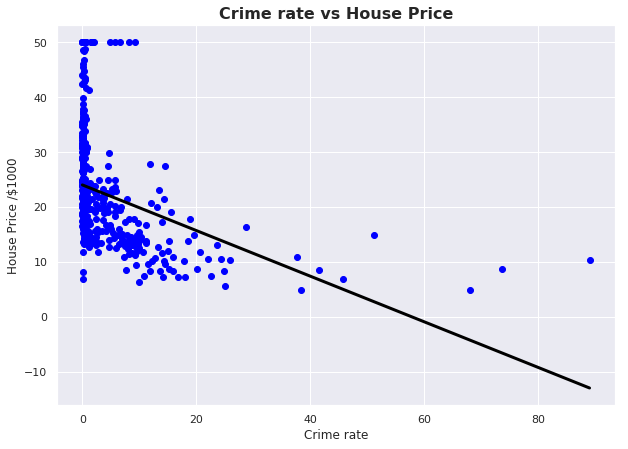

In [19]:
# creating the model
reg = linear_model.LinearRegression().fit(X, y)

# predict
pred_space = np.linspace(min(X), max(X)).reshape(-1, 1)

# plotting data and prediction
plt.figure(figsize=(10, 7))
plt.scatter(X, y, c='blue')
plt.plot(pred_space, reg.predict(pred_space), c='black', linewidth=3)
plt.xlabel('Crime rate')
plt.ylabel('House Price /$1000')
plt.title('Crime rate vs House Price', weight='bold', fontsize=16)
plt.show()

## Model Performance Measure

* The **.score()** method returns the $R^2$ score. The $R^2$ score, also known as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses

In [20]:
print("Test set R^2: {:.2f}".format(reg.score(X, y)))

Test set R^2: 0.15


# Linear Regression in Higher Dimensions
## Linear Regression on all Features

Split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2 score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

$$y = a_1x_1 + a_2x_2 + ... + a_nx_n + b$$

In [7]:
gapminder = pd.read_csv('data/gm_2008_region.csv', header=0)
gapminder.head(2)

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa


* Predict the life expectancy in a given country based on one feature and measure it's performance

In [13]:
# extract only one feature, e.g. "fertility"
X = gapminder.fertility.values.reshape(-1,1)
y = gapminder.life.values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# initialize and train the model
reg = LinearRegression().fit(X_train, y_train)

# predict life expectancy values
y_pred = reg.predict(X_test)

# compute R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2: {:.2f}".format(reg.score(X_test, y_test)))
print("RMSE: {:.2f}".format(rmse))

R^2: 0.74
RMSE: 4.10


* Predict the life expectancy in a given country based on all the numeric features & Model Performance

In [15]:
# drop region column because it contains strings not quantitativ data
gapminder = gapminder.drop('Region', axis=1)

In [16]:
# data
X = gapminder.drop('life', axis=1).values
y = gapminder.life.values

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# initialize & tarin model
reg = LinearRegression().fit(X_train, y_train)

# predict life expectancy values
y_pred = reg.predict(X_test)

# Compute and print R^2 and RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("R^2: {:.2f}".format(reg.score(X_test, y_test)))
print("RMSE: {:.2f}".format(rmse))

R^2: 0.82
RMSE: 3.36


Using all features has improved the model score. This makes sense, as the model has more information to learn from.

# SVM Regression

* minimize the street between data points
* SVM Regression tries to fit as many instances as possible on the street while limiting margin violations
* The width of the street is controlled by a hyperparameter `ε` (tolerance)

In [3]:
# create random data
np.random.seed(0)
X = 3 * np.random.rand(50, 1)
y = (4 + 3 * X + np.random.randn(50, 1)).ravel()

# create 2 svm regressors with different epsilons
svm_reg_2 = LinearSVR(epsilon=2, random_state=0).fit(X, y)
svm_reg_05 = LinearSVR(epsilon=.5, random_state=0).fit(X, y)

def find_support_vectors(regressor, X, y):
    y_pred = regressor.predict(X)
    off_margin = (np.abs(y - y_pred) >= regressor.epsilon)
    return np.argwhere(off_margin)

svm_reg_2.support_ = find_support_vectors(svm_reg_2, X, y)
svm_reg_05.support_ = find_support_vectors(svm_reg_05, X, y)

eps_x1 = 1
eps_y_pred = svm_reg_2.predict([[eps_x1]])

In [4]:
def plot_svm_regression(regressor, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = regressor.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + regressor.epsilon, "k--")
    plt.plot(x1s, y_pred - regressor.epsilon, "k--")
    plt.scatter(X[regressor.support_], y[regressor.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

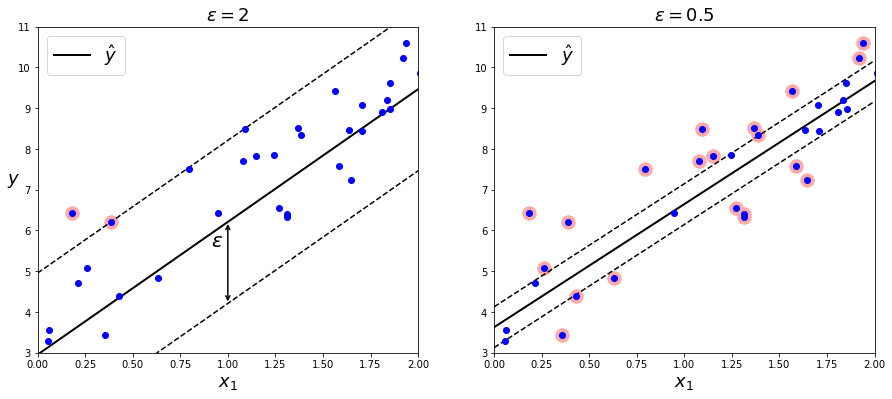

In [7]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
plot_svm_regression(svm_reg_2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_2.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg_2.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

plt.subplot(122)
plot_svm_regression(svm_reg_05, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_05.epsilon), fontsize=18)
plt.show()

* Adding more training instances within the margin does not affect the model’s predictions
* the model is said to be ε -insensitive.